In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix

In [2]:
df = pd.read_excel("dataset2.xlsx")

In [3]:
# Define target variable
target_columns = ['4bc_Benign', '4bc_Pathogenic', '4bc_VUS']

In [4]:
target_columns

['4bc_Benign', '4bc_Pathogenic', '4bc_VUS']

In [5]:
# Define feature columns
feature_columns = df.columns[:-3]

In [6]:
# Split the data into features (X) and target (y)
X = df[feature_columns]
y = df[target_columns]

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Save the column names used in the model training (from X_train)
trained_columns = X_train.columns

# You can store this list as a file or as part of the model's metadata.
# Save to a file (e.g., in a CSV or JSON format)
import json

# Save trained_columns to a JSON file
with open('C:/Users/HP/Downloads/TID-Work/saved_models/trained_columns.json', 'w') as f:
    json.dump(list(trained_columns), f)

Accuracy: 0.9504484304932735
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3909
           1       0.88      0.80      0.84       297
           2       0.83      0.70      0.76       254

   micro avg       0.96      0.95      0.96      4460
   macro avg       0.90      0.83      0.86      4460
weighted avg       0.96      0.95      0.96      4460
 samples avg       0.95      0.95      0.95      4460



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


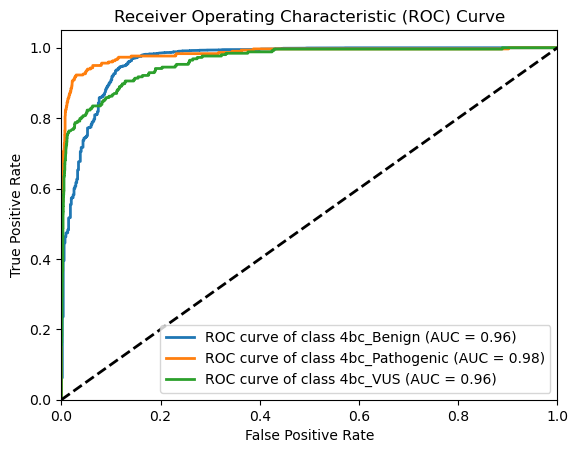

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Initialize the OneVsRestClassifier with LogisticRegression
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.940134529147982
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3909
           1       0.78      0.87      0.82       297
           2       0.80      0.71      0.76       254

   micro avg       0.96      0.95      0.95      4460
   macro avg       0.85      0.85      0.85      4460
weighted avg       0.96      0.95      0.95      4460
 samples avg       0.94      0.95      0.95      4460



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


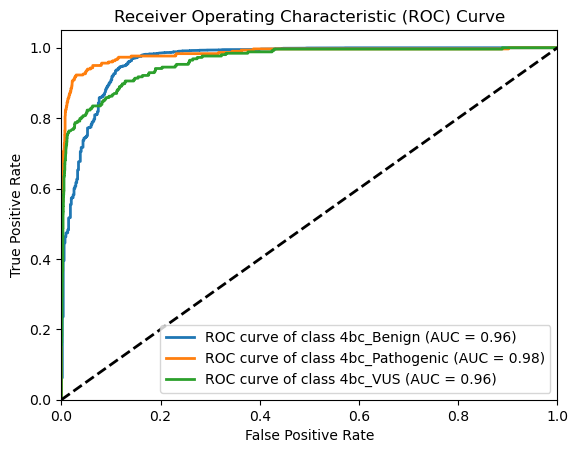

In [9]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Assume y_train is a DataFrame with multi-labels
# Convert y_train to a suitable format (e.g., NumPy array)
y_train_array = y_train.values


# Fit SMOTE on the training data for each label independently
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_array)

# Initialize the OneVsRestClassifier with LogisticRegression
model_smote = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model_smote.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
# Original dataset size
original_size = X_train.shape[0]

# Resampled dataset size
resampled_size = X_train_resampled.shape[0]

# Calculate the number of synthetic samples created
num_synthetic_samples = resampled_size - original_size

# Calculate percentage of synthetic samples
percentage_smote = (num_synthetic_samples / resampled_size) * 100

# Print results
print(f"Original dataset size: {original_size}")
print(f"Resampled dataset size: {resampled_size}")
print(f"Number of synthetic samples created: {num_synthetic_samples}")
print(f"Percentage of synthetic samples: {percentage_smote:.2f}%")

Original dataset size: 17839
Resampled dataset size: 46467
Number of synthetic samples created: 28628
Percentage of synthetic samples: 61.61%


In [11]:
# Calculate class imbalance after SMOTE
class_counts = y_train_resampled.sum()  # This sums up each column (class)

# Print class counts
print("Class distribution after SMOTE:")
print(class_counts)

# Calculate the imbalance ratio
majority_class = class_counts.max()
minority_class = class_counts.min()
imbalance_ratio = majority_class / minority_class

# Print results
print(f"\nMajority class count: {majority_class}")
print(f"Minority class count: {minority_class}")
print(f"Imbalance ratio (majority/minority): {imbalance_ratio:.2f}")

Class distribution after SMOTE:
46467

Majority class count: 46467
Minority class count: 46467
Imbalance ratio (majority/minority): 1.00


KNN Accuracy: 0.8654708520179372
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      3909
           1       0.61      0.88      0.72       297
           2       0.36      0.81      0.50       254

   micro avg       0.87      0.87      0.87      4460
   macro avg       0.65      0.85      0.71      4460
weighted avg       0.93      0.87      0.89      4460
 samples avg       0.87      0.87      0.87      4460



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


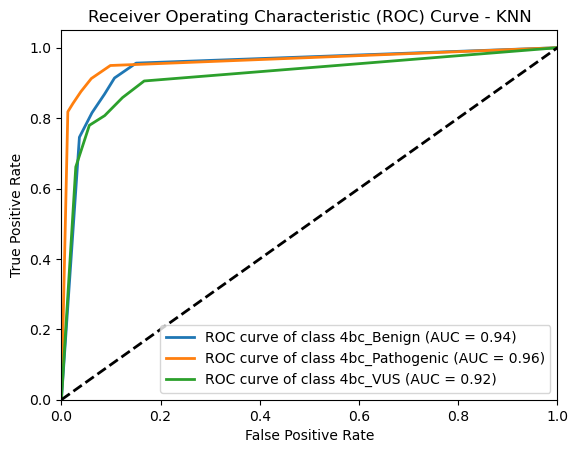

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Compute ROC curve and AUC for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    # Check that the model can predict probabilities
    if hasattr(knn_model, "predict_proba"):
        y_score = knn_model.predict_proba(X_test)[:, i]
        
        # Compute ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        print(f"Model does not support probability predictions for class {i}.")

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

In [11]:
import joblib

# Save the trained model to a file
joblib.dump(knn_model, 'C:/Users/HP/Downloads/TID-Work/saved_models/KNN_model_with_smote.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/KNN_model_with_smote.pkl']

KNN Accuracy: 0.95695067264574
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3909
           1       0.87      0.83      0.85       297
           2       0.86      0.67      0.75       254

   micro avg       0.96      0.96      0.96      4460
   macro avg       0.90      0.83      0.86      4460
weighted avg       0.96      0.96      0.96      4460
 samples avg       0.96      0.96      0.96      4460



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


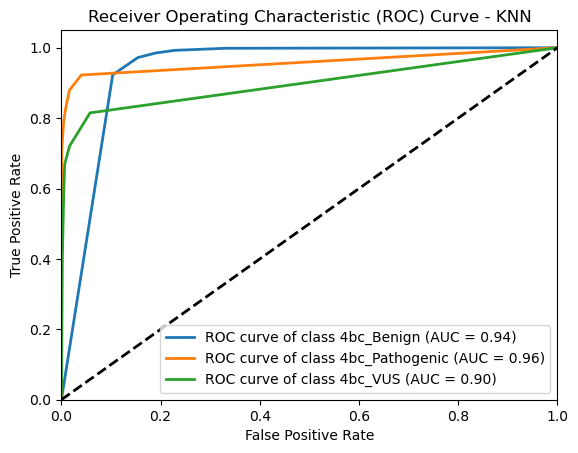

In [13]:
# Initialize KNN Classifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Compute ROC curve and AUC for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    # Check that the model can predict probabilities
    if hasattr(knn_model, "predict_proba"):
        y_score = knn_model.predict_proba(X_test)[:, i]
        
        # Compute ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        print(f"Model does not support probability predictions for class {i}.")

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

Naive Bayes Accuracy: 0.7632286995515695
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3909
           1       0.67      0.88      0.76       297
           2       0.22      0.85      0.35       254

   micro avg       0.81      0.93      0.87      4460
   macro avg       0.62      0.89      0.69      4460
weighted avg       0.91      0.93      0.91      4460
 samples avg       0.85      0.93      0.88      4460



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


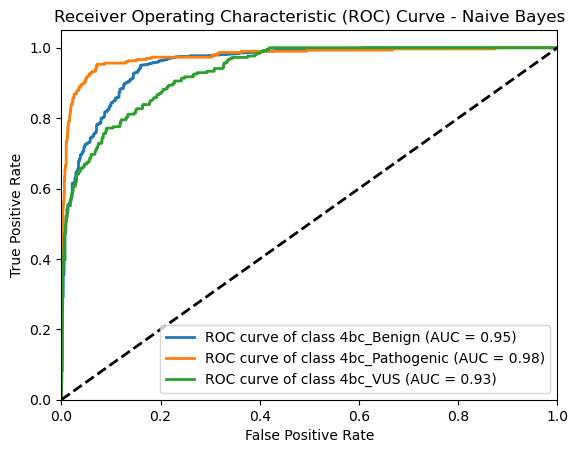

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes Classifier
nb_model = OneVsRestClassifier(MultinomialNB())
nb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], nb_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Naive Bayes Accuracy: 0.8941704035874439
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3909
           1       0.63      0.83      0.72       297
           2       0.49      0.74      0.59       254

   micro avg       0.90      0.95      0.92      4460
   macro avg       0.70      0.85      0.76      4460
weighted avg       0.92      0.95      0.93      4460
 samples avg       0.92      0.95      0.93      4460



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


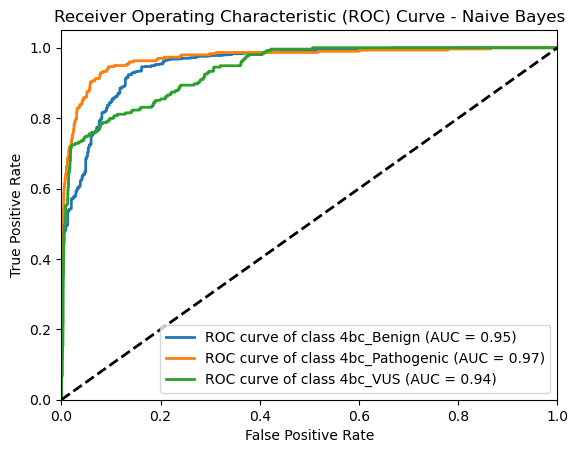

In [14]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes Classifier
nb_model = OneVsRestClassifier(MultinomialNB())
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], nb_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Decision Tree Accuracy: 0.9280269058295965
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3909
           1       0.80      0.88      0.84       297
           2       0.60      0.70      0.65       254

   micro avg       0.94      0.94      0.94      4460
   macro avg       0.79      0.85      0.82      4460
weighted avg       0.95      0.94      0.94      4460
 samples avg       0.93      0.94      0.94      4460



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


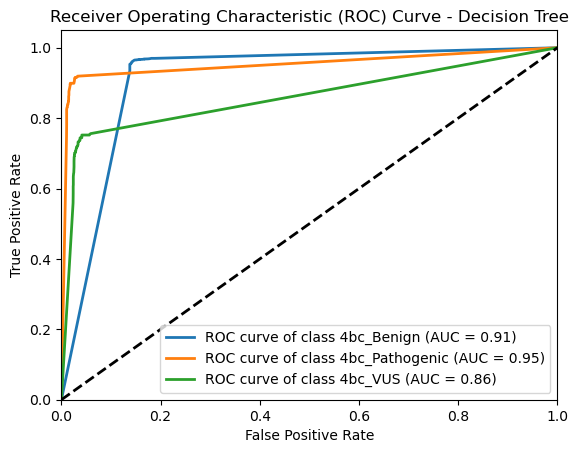

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = OneVsRestClassifier(DecisionTreeClassifier())
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], dt_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [13]:
import joblib

# Save the trained model to a file
joblib.dump(dt_model, 'C:/Users/HP/Downloads/TID-Work/saved_models/DT_model_with_smote.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/DT_model_with_smote.pkl']

Decision Tree Accuracy: 0.9468609865470852
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3909
           1       0.91      0.83      0.87       297
           2       0.75      0.68      0.71       254

   micro avg       0.96      0.95      0.95      4460
   macro avg       0.88      0.83      0.85      4460
weighted avg       0.96      0.95      0.95      4460
 samples avg       0.95      0.95      0.95      4460



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


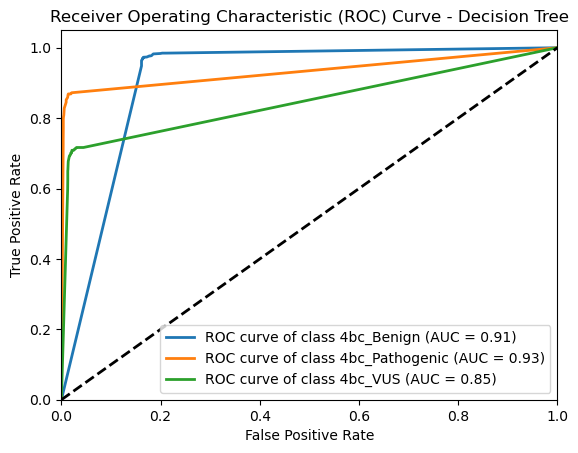

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = OneVsRestClassifier(DecisionTreeClassifier())
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], dt_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [17]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'C:/Users/HP/Downloads/TID-Work/saved_models/DT_model.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/DT_model.pkl']

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])C
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

SyntaxError: invalid syntax (640510920.py, line 30)

In [15]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'C:/Users/HP/Downloads/TID-Work/saved_models/RF_model_with_smote.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/RF_model_with_smote.pkl']

Random Forest Accuracy: 0.9692459016393442
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14471
           1       0.92      0.78      0.84       370
           2       0.63      0.40      0.49       409

   micro avg       0.97      0.97      0.97     15250
   macro avg       0.84      0.72      0.77     15250
weighted avg       0.97      0.97      0.97     15250
 samples avg       0.97      0.97      0.97     15250



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


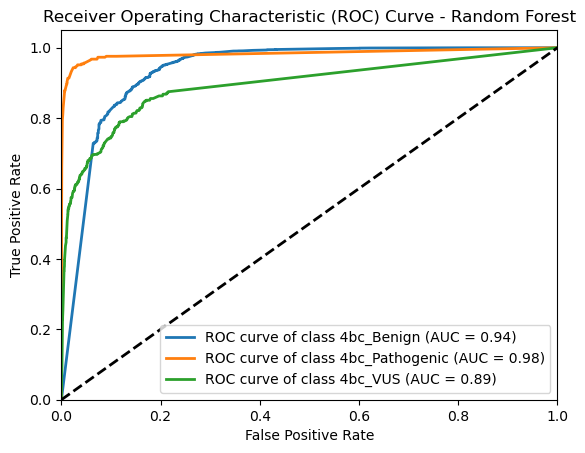

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [19]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'C:/Users/HP/Downloads/TID-Work/saved_models/RF_model.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/RF_model.pkl']

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:25:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:25:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:25:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8851803278688525
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     14471
           1       0.65      0.91      0.76       370
           2       0.18      0.63      0.28       409

   micro avg       0.90      0.90      0.90     15250
   macro avg       0.61      0.82      0.66     15250
weighted avg       0.96      0.90      0.92     15250
 samples avg       0.89      0.90      0.89     15250



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


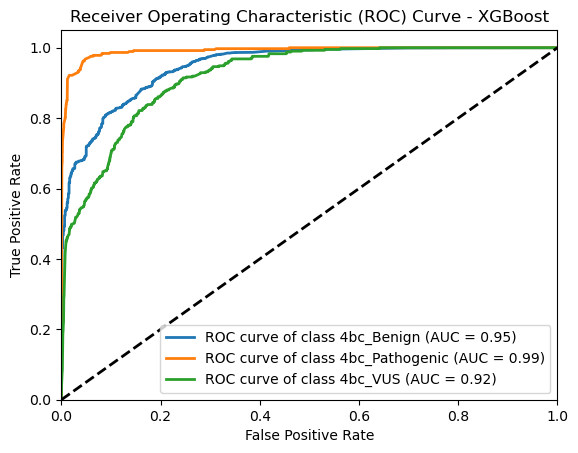

In [16]:
import xgboost as xgb

# Initialize XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Compute ROC curve and AUC for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    y_score = xgb_model.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

In [17]:
import joblib

# Save the trained model to a file
joblib.dump(xgb_model, 'C:/Users/HP/Downloads/TID-Work/saved_models/XGB_with_smote.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/XGB_with_smote.pkl']

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9700983606557377
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14471
           1       0.91      0.77      0.83       370
           2       0.64      0.36      0.46       409

   micro avg       0.97      0.97      0.97     15250
   macro avg       0.84      0.71      0.76     15250
weighted avg       0.97      0.97      0.97     15250
 samples avg       0.97      0.97      0.97     15250



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


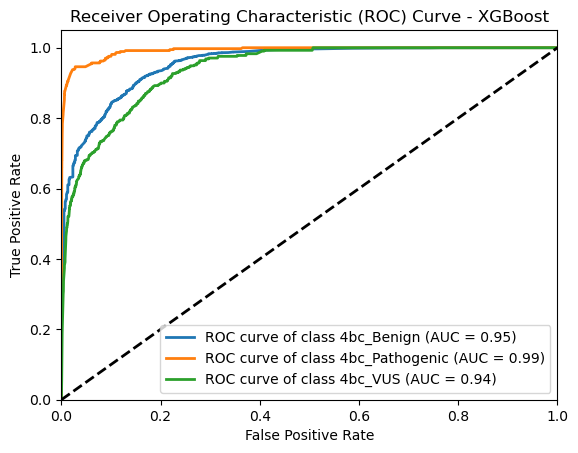

In [23]:
import xgboost as xgb

# Initialize XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Compute ROC curve and AUC for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    y_score = xgb_model.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 57708, number of negative: 115416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 173124, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 57708, number of negative: 115416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


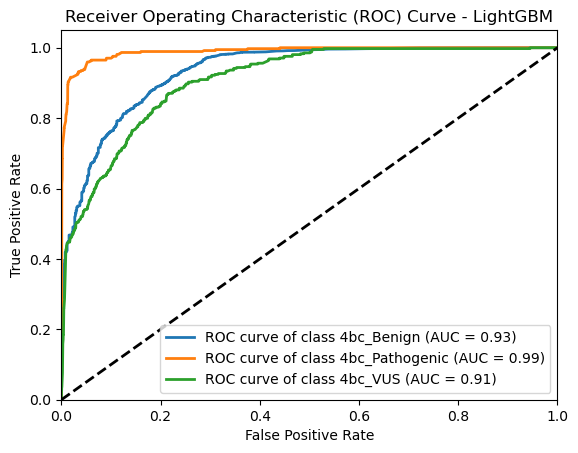

In [18]:
import lightgbm as lgb

# Initialize LightGBM Classifier
lgb_model = OneVsRestClassifier(lgb.LGBMClassifier())
lgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# Compute ROC curve and AUC for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    y_score = lgb_model.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()

In [19]:
import joblib

# Save the trained model to a file
joblib.dump(lgb_model, 'C:/Users/HP/Downloads/TID-Work/saved_models/LGB_with_smote.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/LGB_with_smote.pkl']

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 57708, number of negative: 3290
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 60998, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.946064 -> initscore=2.864508
[LightGBM] [Info] Start training from score 2.864508
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1616, number of negative: 59382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


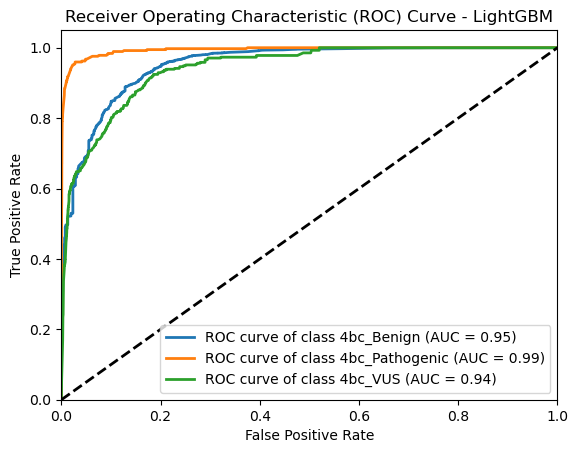

In [20]:
import lightgbm as lgb

# Initialize LightGBM Classifier
lgb_model = OneVsRestClassifier(lgb.LGBMClassifier())
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# Compute ROC curve and AUC for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    y_score = lgb_model.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()

In [21]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'C:/Users/HP/Downloads/TID-Work/saved_models/LGB_model.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/LGB_model.pkl']

CatBoost Accuracy: 0.9041311475409836
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     14471
           1       0.66      0.91      0.76       370
           2       0.21      0.65      0.32       409

   micro avg       0.91      0.91      0.91     15250
   macro avg       0.62      0.83      0.68     15250
weighted avg       0.96      0.91      0.93     15250
 samples avg       0.91      0.91      0.91     15250



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


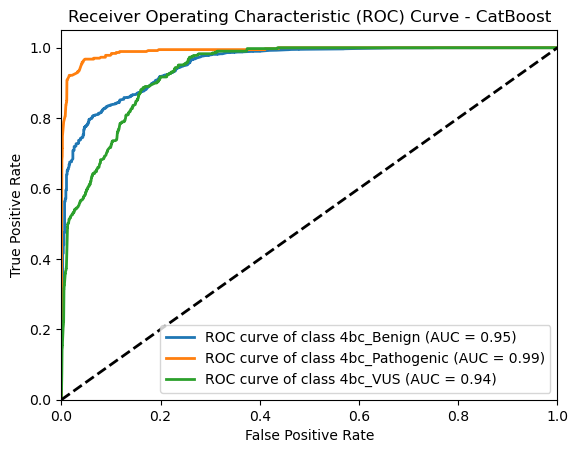

In [20]:
from catboost import CatBoostClassifier

# Initialize CatBoost Classifier
cat_model = OneVsRestClassifier(CatBoostClassifier(verbose=0))
cat_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_cat = cat_model.predict(X_test)

# Evaluate the model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Compute ROC curve and AUC for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    y_score = cat_model.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CatBoost')
plt.legend(loc="lower right")
plt.show()

In [21]:
import joblib

# Save the trained model to a file
joblib.dump(cat_model, 'C:/Users/HP/Downloads/TID-Work/saved_models/CAT_with_smote.pkl')

['C:/Users/HP/Downloads/TID-Work/saved_models/CAT_with_smote.pkl']

CatBoost Accuracy: 0.9700327868852459
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14471
           1       0.93      0.78      0.85       370
           2       0.67      0.41      0.51       409

   micro avg       0.97      0.97      0.97     15250
   macro avg       0.86      0.73      0.78     15250
weighted avg       0.97      0.97      0.97     15250
 samples avg       0.97      0.97      0.97     15250



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


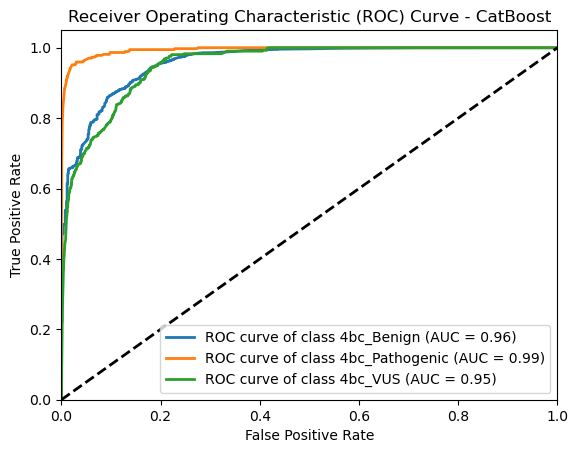

In [27]:
from catboost import CatBoostClassifier

# Initialize CatBoost Classifier
cat_model = OneVsRestClassifier(CatBoostClassifier(verbose=0))
cat_model.fit(X_train, y_train)

# Make predictions
y_pred_cat = cat_model.predict(X_test)

# Evaluate the model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Compute ROC curve and AUC for each class
y_test_bin = y_test.values  # Convert y_test to binary
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    y_score = cat_model.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(target_columns[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CatBoost')
plt.legend(loc="lower right")
plt.show()